<a href="https://colab.research.google.com/github/Tochindefo/weather-forecast/blob/main/weather_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT LIBRARIES

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import classification_report
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics


# pload the dataset

In [ ]:
data = pd.read_csv('powerconsumption.csv')


# Data exploration

In [ ]:
data.shape

(52416, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                52416 non-null  object 
 1   Temperature             52416 non-null  float64
 2   Humidity                52416 non-null  float64
 3   WindSpeed               52416 non-null  float64
 4   GeneralDiffuseFlows     52416 non-null  float64
 5   DiffuseFlows            52416 non-null  float64
 6   PowerConsumption_Zone1  52416 non-null  float64
 7   PowerConsumption_Zone2  52416 non-null  float64
 8   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [ ]:
data.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [ ]:
data.tail()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504
52415,12/30/2017 23:50,6.580,74.1,0.081,0.062,0.111,28349.80989,24055.23167,13345.49820


In [ ]:
data.transpose()

,0,1,2,3,4,5,6,7,8,9,...,52406,52407,52408,52409,52410,52411,52412,52413,52414,52415
Datetime,1/1/2017 0:00,1/1/2017 0:10,1/1/2017 0:20,1/1/2017 0:30,1/1/2017 0:40,1/1/2017 0:50,1/1/2017 1:00,1/1/2017 1:10,1/1/2017 1:20,1/1/2017 1:30,...,12/30/2017 22:20,12/30/2017 22:30,12/30/2017 22:40,12/30/2017 22:50,12/30/2017 23:00,12/30/2017 23:10,12/30/2017 23:20,12/30/2017 23:30,12/30/2017 23:40,12/30/2017 23:50
Temperature,6.559,6.414,6.313,6.121,5.921,5.853,5.641,5.496,5.678,5.491,...,7.65,7.48,7.39,7.34,7.07,7.01,6.947,6.9,6.758,6.58
Humidity,73.8,74.5,74.5,75.0,75.7,76.9,77.7,78.2,78.1,77.3,...,70.1,71.0,71.2,71.0,72.5,72.4,72.6,72.8,73.0,74.1
WindSpeed,0.083,0.083,0.08,0.083,0.081,0.081,0.08,0.085,0.081,0.082,...,0.081,0.085,0.079,0.084,0.08,0.08,0.082,0.086,0.08,0.081
GeneralDiffuseFlows,0.051,0.07,0.062,0.091,0.048,0.059,0.048,0.055,0.066,0.062,...,0.062,0.062,0.066,0.037,0.059,0.04,0.051,0.084,0.066,0.062
DiffuseFlows,0.119,0.085,0.1,0.096,0.085,0.108,0.096,0.093,0.141,0.111,...,0.122,0.104,0.1,0.119,0.093,0.096,0.093,0.074,0.089,0.111
PowerConsumption_Zone1,34055.6962,29814.68354,29128.10127,28228.86076,27335.6962,26624.81013,25998.98734,25446.07595,24777.72152,24279.49367,...,34323.95437,33776.42586,33387.07224,32815.20913,32158.1749,31160.45627,30430.41825,29590.87452,28958.1749,28349.80989
PowerConsumption_Zone2,16128.87538,19375.07599,19006.68693,18361.09422,17872.34043,17416.41337,16993.31307,16661.39818,16227.35562,15939.20973,...,28676.28107,28230.74563,27814.66708,27564.28352,27273.39675,26857.3182,26124.57809,25277.69254,24692.23688,24055.23167
PowerConsumption_Zone3,20240.96386,20131.08434,19668.43373,18899.27711,18442.40964,18130.12048,17945.06024,17459.27711,17025.54217,16794.21687,...,15684.994,15546.69868,15396.87875,15172.14886,14987.7551,14780.31212,14428.81152,13806.48259,13512.60504,13345.4982


#looking for missing data

In [ ]:
missing_values =data.isnull().sum()
print(missing_values)

Datetime                  0
Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
dtype: int64


In [ ]:
print(data.columns)

Index(['Datetime', 'Temperature', 'Humidity', 'WindSpeed',
       'GeneralDiffuseFlows', 'DiffuseFlows', 'PowerConsumption_Zone1',
       'PowerConsumption_Zone2', 'PowerConsumption_Zone3'],
      dtype='object')


# Checking % of Null values within dataset

In [ ]:

missed = pd.DataFrame()

missed['column'] = data.columns

missed['percent'] = [round(100* data[col].isnull().sum() / len(data), 2) for col in data.columns]

missed = missed.sort_values('percent',ascending=False)
print(missed)

                   column  percent
0                Datetime      0.0
1             Temperature      0.0
2                Humidity      0.0
3               WindSpeed      0.0
4     GeneralDiffuseFlows      0.0
5            DiffuseFlows      0.0
6  PowerConsumption_Zone1      0.0
7  PowerConsumption_Zone2      0.0
8  PowerConsumption_Zone3      0.0


#Transforms

In [ ]:

data = data.set_index('Datetime')
data.index = pd.to_datetime(data.index)

#Visualizing dataset first 5 records
data.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
Datetime,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [ ]:
def create_features(data):
    """
    Create time series features based on time series index.
    """
    data = data.copy()
    data['hour'] = data.index.hour
    data['dayofweek'] = data.index.dayofweek
    data['quarter'] = data.index.quarter
    data['month'] = data.index.month
    data['year'] = data.index.year
    data['dayofyear'] = data.index.dayofyear
    data['dayofmonth'] = data.index.day
    data['weekofyear'] = data.index.isocalendar().week
    return data

data = create_features(data)

In [ ]:
#Calculating 10-day, 15-day and 30-day Simple Moving Average

data['SMA10'] = data['PowerConsumption_Zone1'].rolling(10).mean()
data['SMA15'] = data['PowerConsumption_Zone1'].rolling(15).mean()
data['SMA30'] = data['PowerConsumption_Zone1'].rolling(30).mean()


In [ ]:
data.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,SMA10,SMA15,SMA30
Datetime,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,0,6,1,1,2017,1,1,52,NaN,NaN,NaN
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,0,6,1,1,2017,1,1,52,NaN,NaN,NaN
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,0,6,1,1,2017,1,1,52,NaN,NaN,NaN
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,0,6,1,1,2017,1,1,52,NaN,NaN,NaN
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,0,6,1,1,2017,1,1,52,NaN,NaN,NaN


#visualization (EDA)

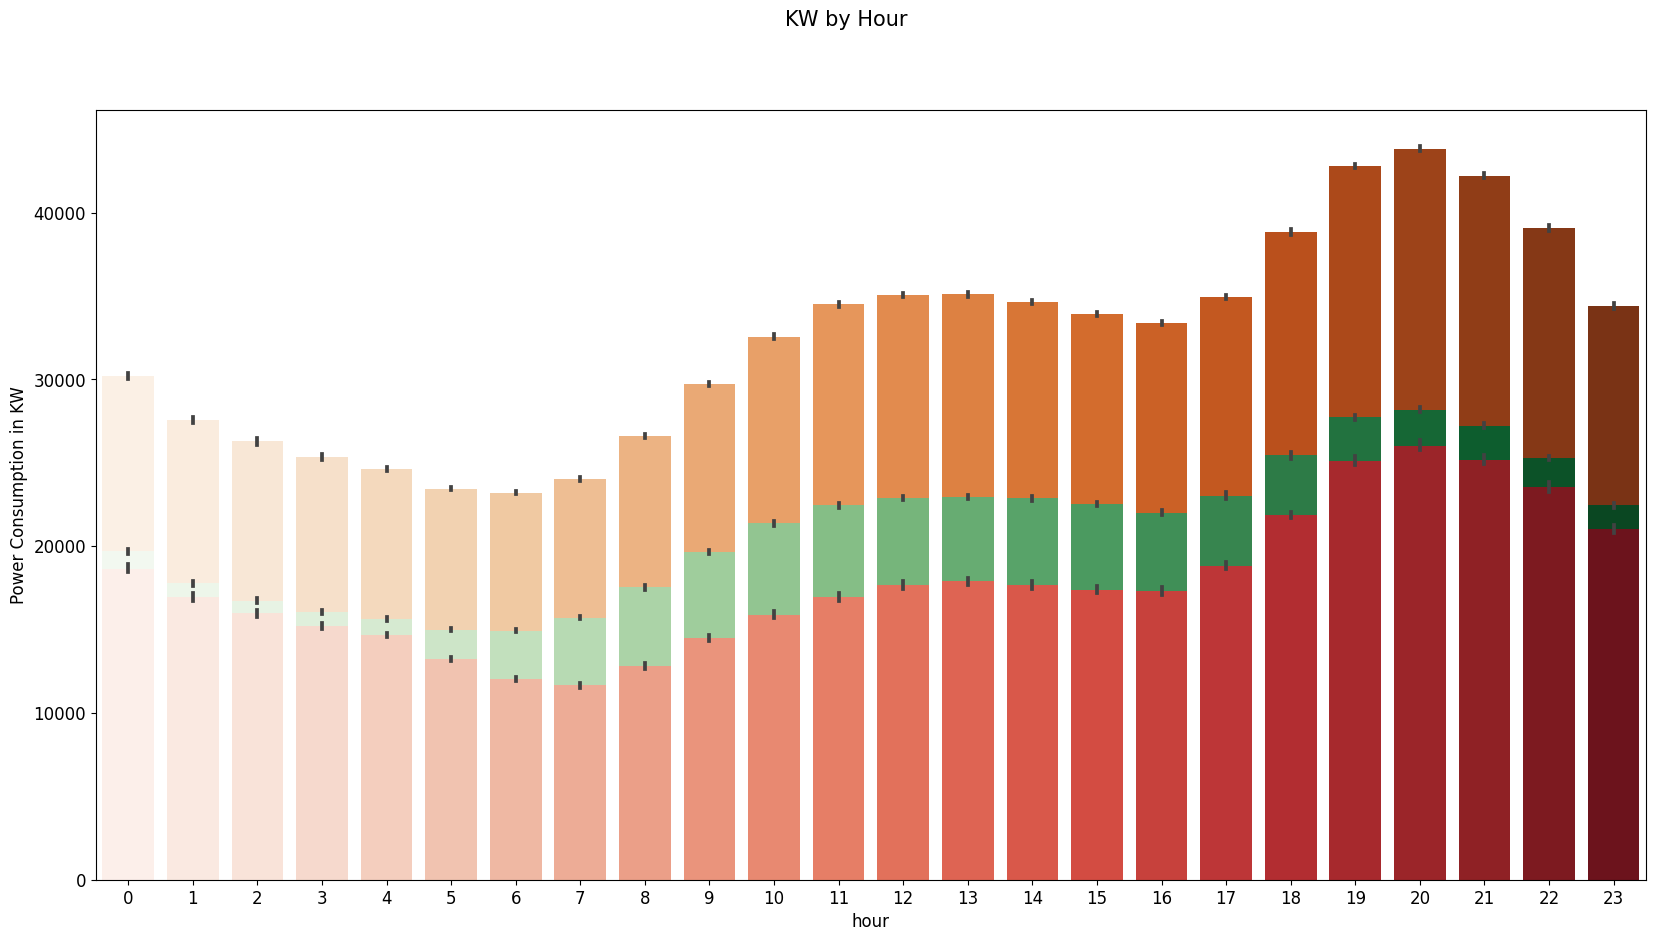

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

zone1 = sns.barplot(data=data, x='hour', y='PowerConsumption_Zone1', palette = 'Oranges')
zone2 = sns.barplot(data=data, x='hour', y='PowerConsumption_Zone2', palette = 'Greens')
zone3 = sns.barplot(data=data, x='hour', y='PowerConsumption_Zone3', palette = 'Reds')

plt.suptitle('KW by Hour', fontsize=15)
plt.xlabel('hour', fontsize=12)
plt.ylabel('Power Consumption in KW', fontsize=12)
#plt.legend(loc='upper left')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#Generating plot
plt.show()

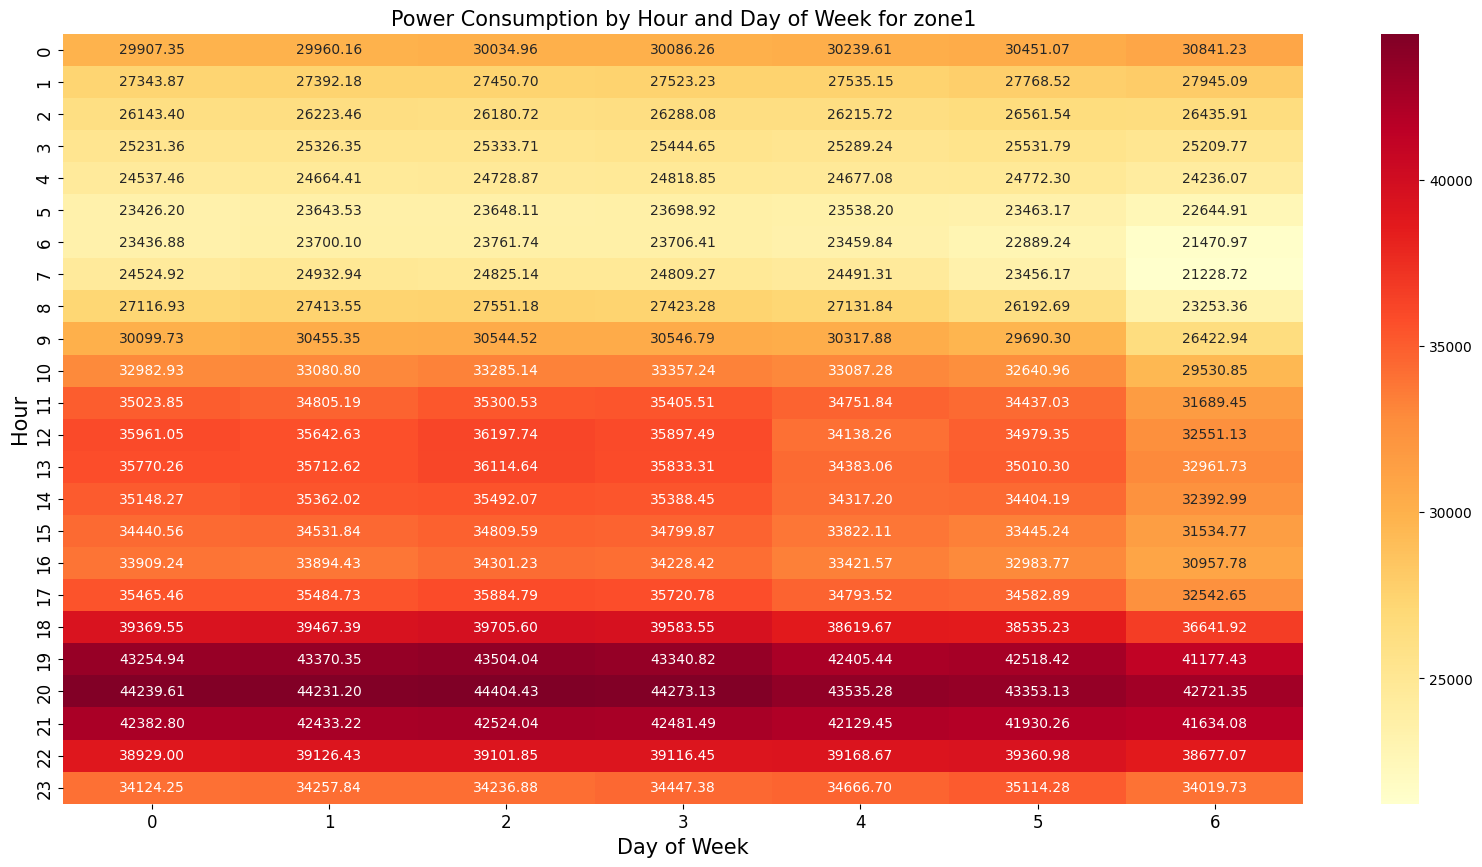

In [ ]:
# Reshape the data using pivot_table
data_heatmap = pd.pivot_table(data, values='PowerConsumption_Zone1', index='hour', columns='dayofweek')

# Create the heatmap using seaborn
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(data_heatmap, cmap='YlOrRd', annot=True, fmt='.2f')
plt.title('Power Consumption by Hour and Day of Week for zone1', fontsize=15)
plt.xlabel('Day of Week', fontsize=15)
plt.ylabel('Hour', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

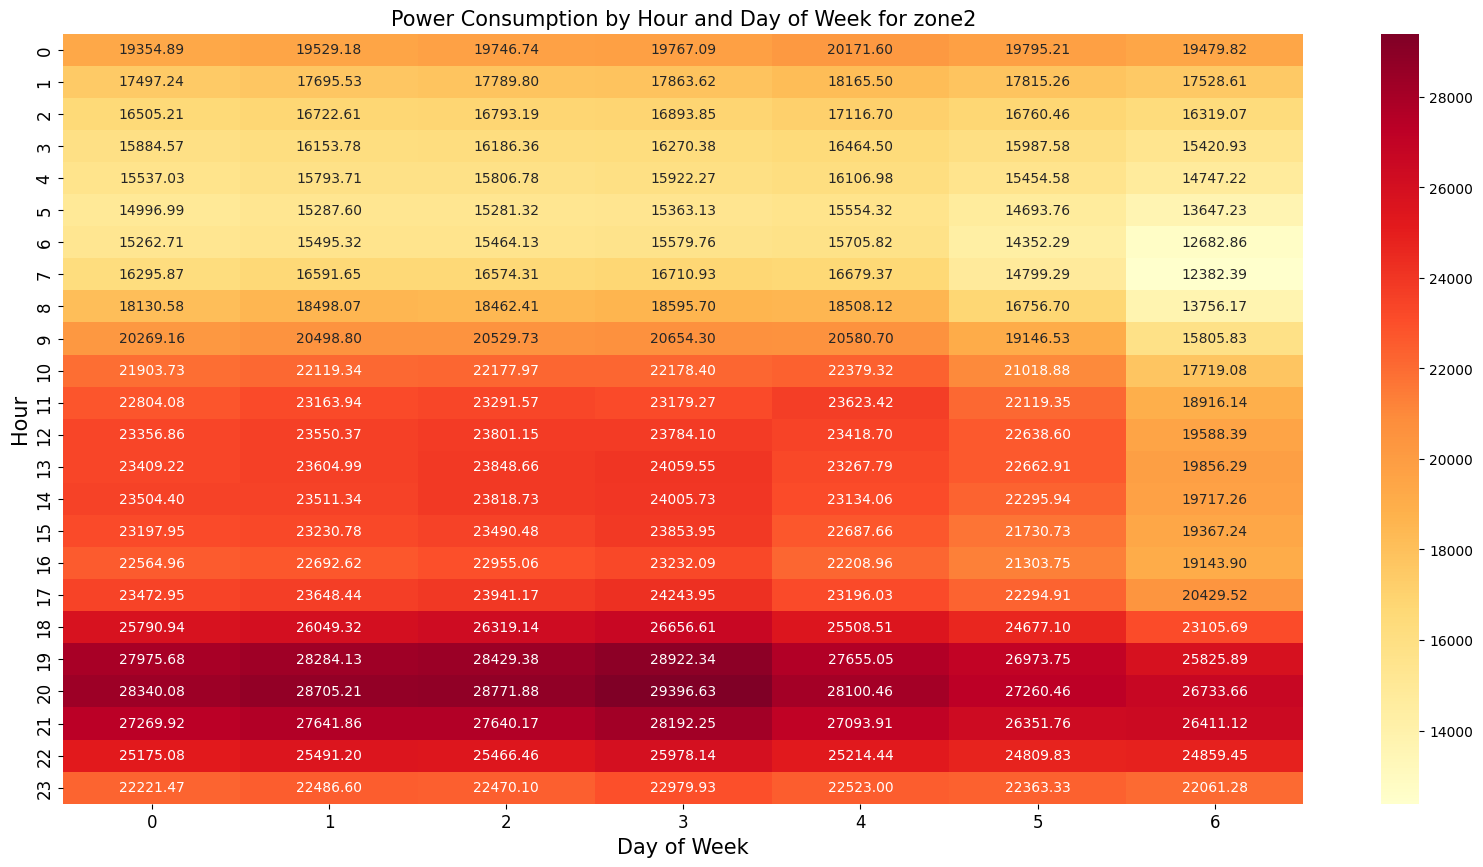

In [ ]:
# Reshape the data using pivot_table
data_heatmap = pd.pivot_table(data, values='PowerConsumption_Zone2', index='hour', columns='dayofweek')

# Create the heatmap using seaborn
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(data_heatmap, cmap='YlOrRd', annot=True, fmt='.2f')
plt.title('Power Consumption by Hour and Day of Week for zone2', fontsize=15)
plt.xlabel('Day of Week', fontsize=15)
plt.ylabel('Hour', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

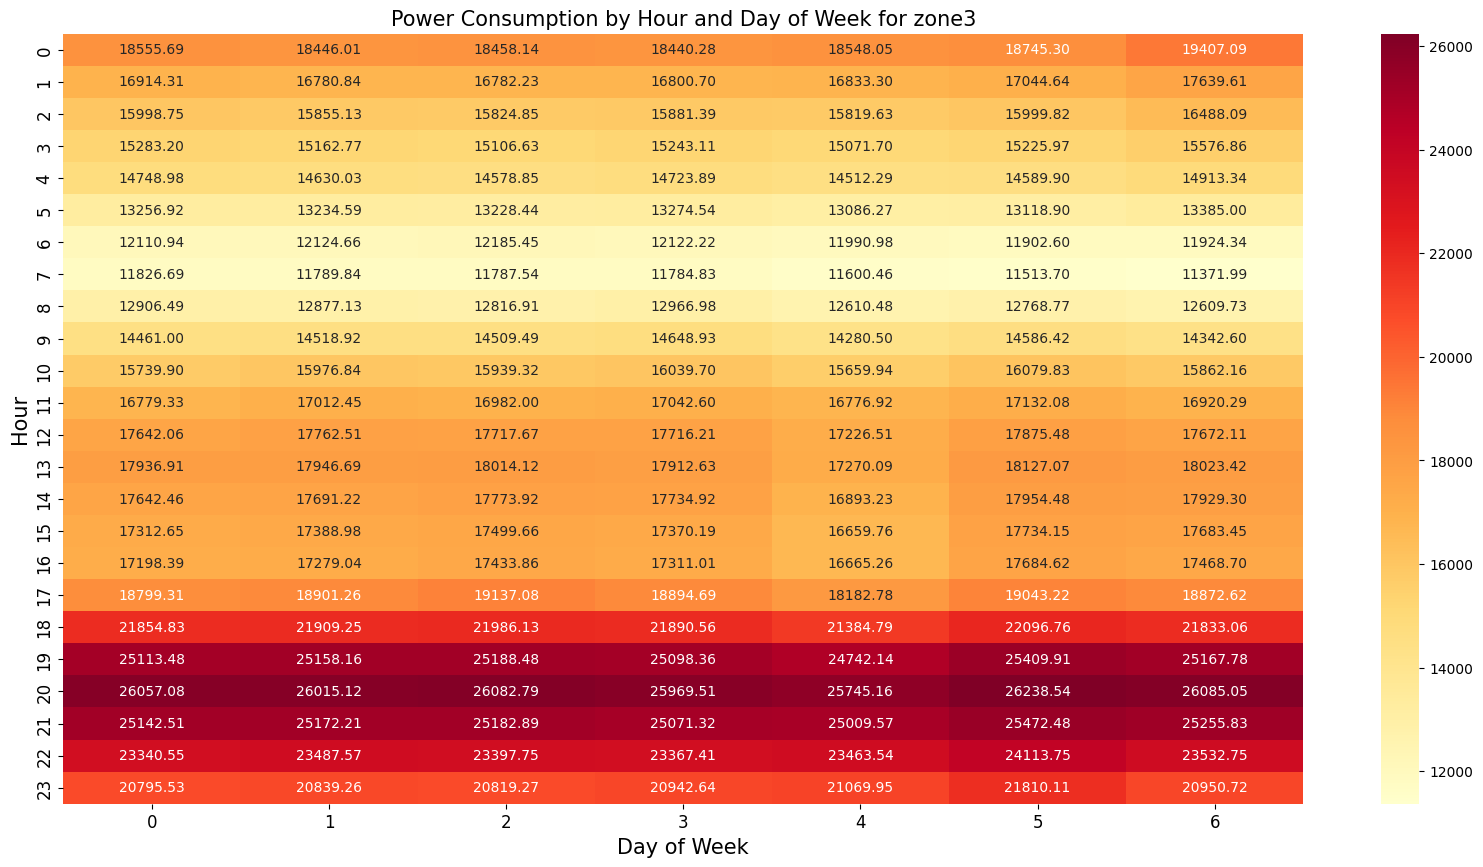

In [ ]:
# Reshape the data using pivot_table
data_heatmap = pd.pivot_table(data, values='PowerConsumption_Zone3', index='hour', columns='dayofweek')

# Create the heatmap using seaborn
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(data_heatmap, cmap='YlOrRd', annot=True, fmt='.2f')
plt.title('Power Consumption by Hour and Day of Week for zone3', fontsize=15)
plt.xlabel('Day of Week', fontsize=15)
plt.ylabel('Hour', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

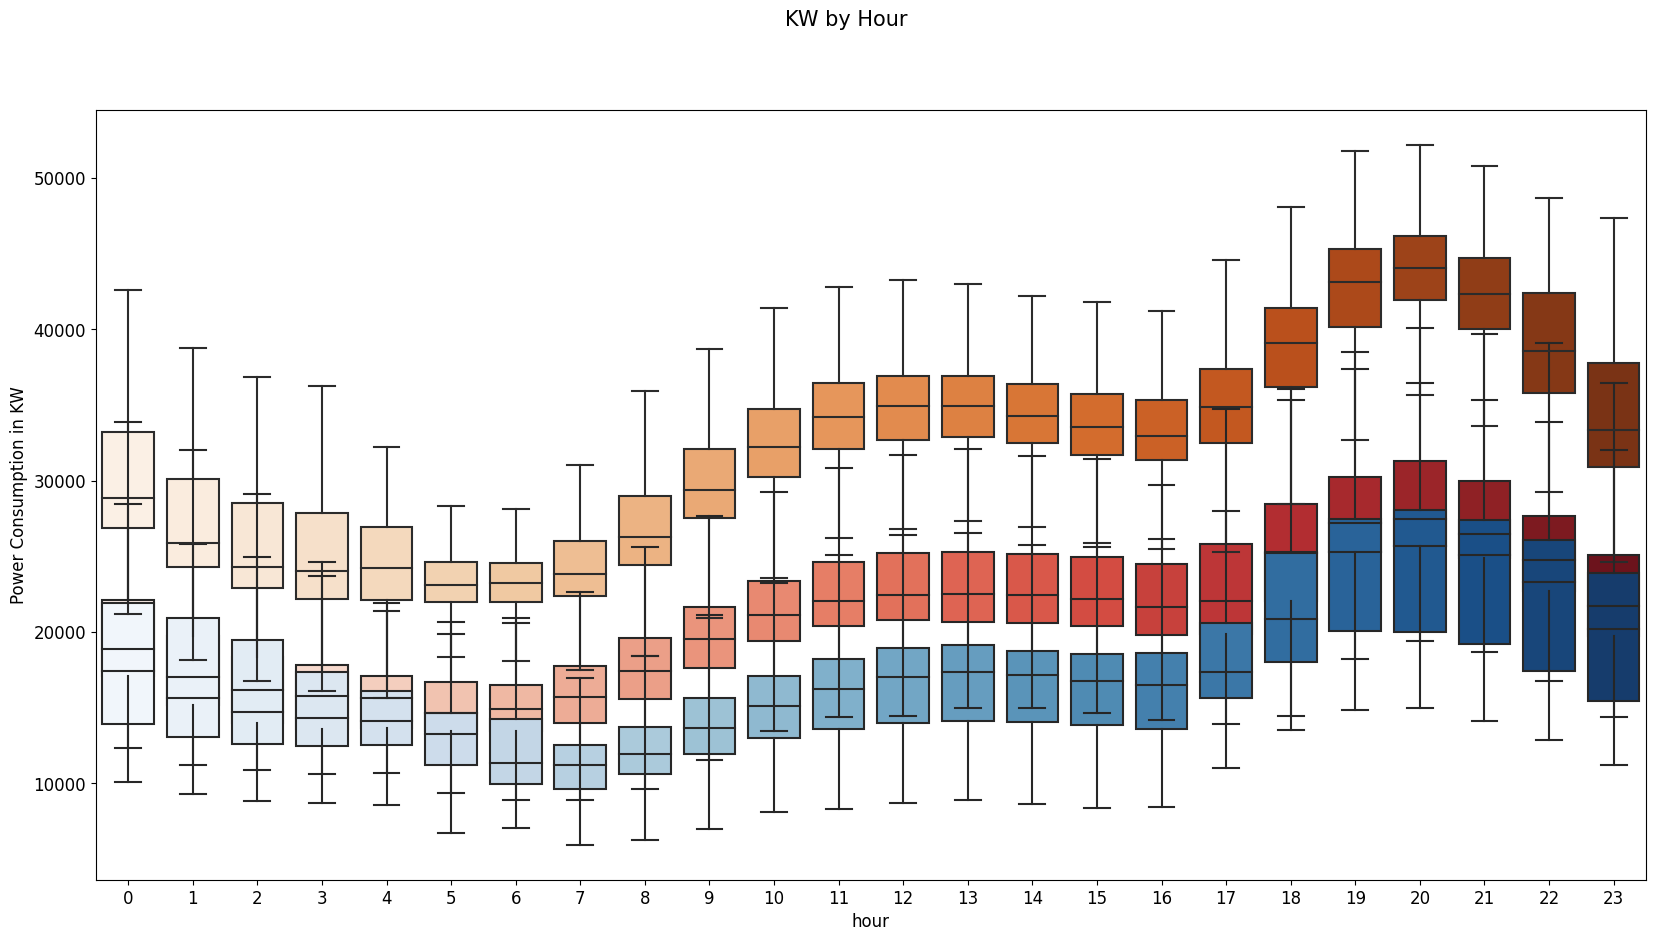

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

zone1 = sns.boxplot(data=data, x='hour', y='PowerConsumption_Zone1', palette = 'Oranges', showfliers=False)
zone2 = sns.boxplot(data=data, x='hour', y='PowerConsumption_Zone2', palette = 'Reds', showfliers=False)
zone3 = sns.boxplot(data=data, x='hour', y='PowerConsumption_Zone3', palette = 'Blues', showfliers=False)

plt.suptitle('KW by Hour', fontsize=15)
plt.xlabel('hour', fontsize=12)
plt.ylabel('Power Consumption in KW', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#Generating plot
plt.show()

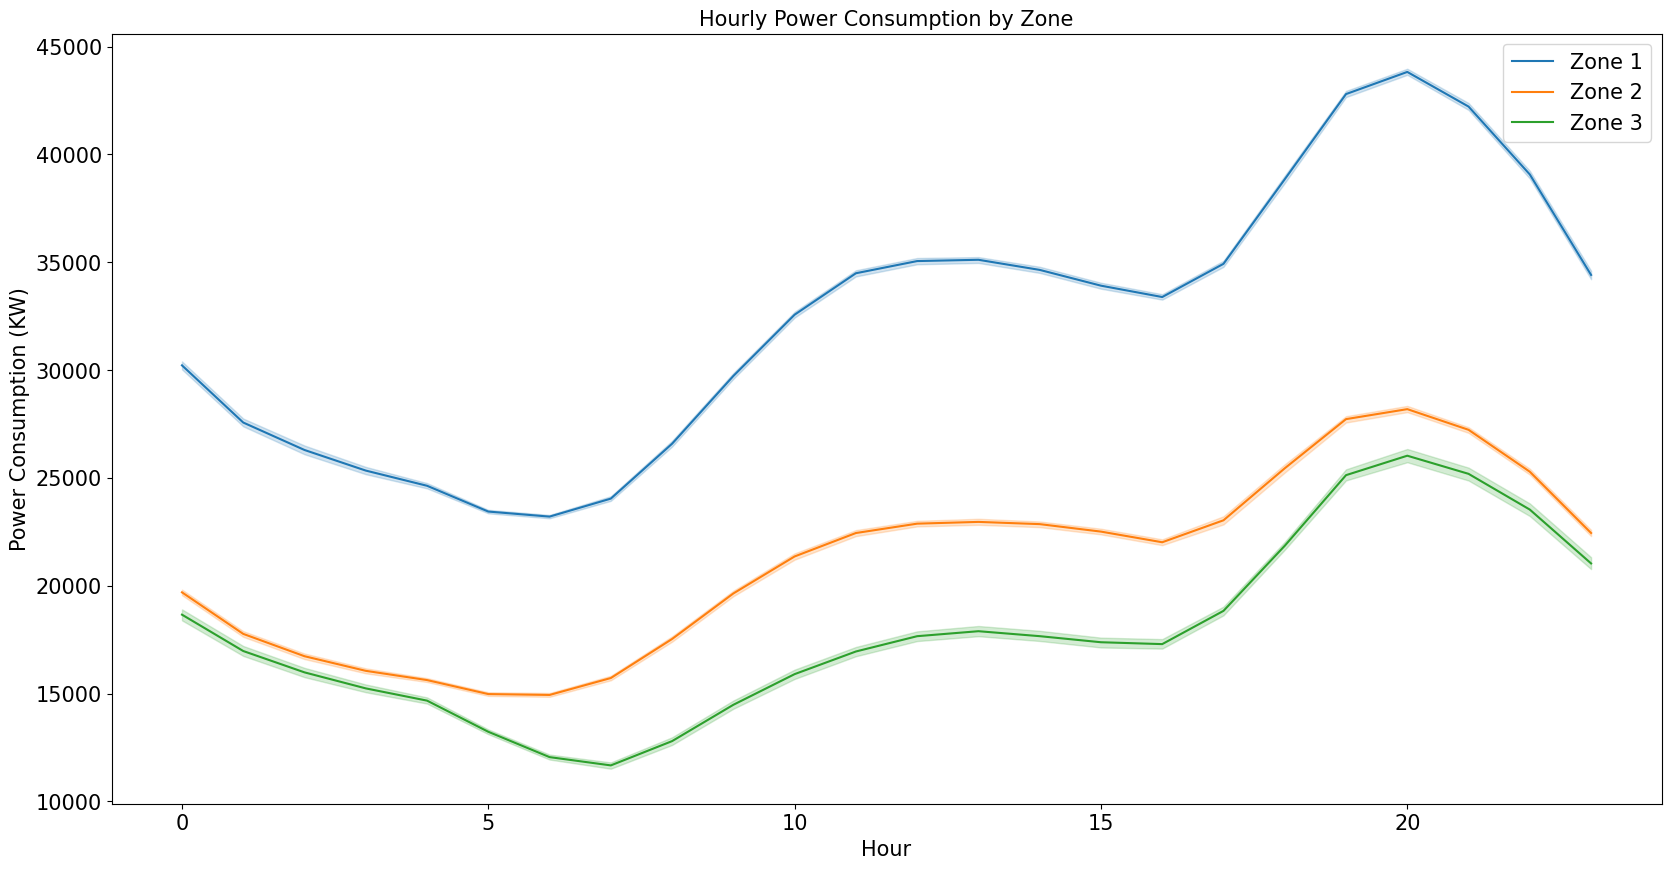

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

sns.lineplot(data=data, x='hour', y='PowerConsumption_Zone1', ax=ax, label='Zone 1')
sns.lineplot(data=data, x='hour', y='PowerConsumption_Zone2', ax=ax, label='Zone 2')
sns.lineplot(data=data, x='hour', y='PowerConsumption_Zone3', ax=ax, label='Zone 3')

plt.title('Hourly Power Consumption by Zone', fontsize=15)
plt.xlabel('Hour', fontsize=15)
plt.ylabel('Power Consumption (KW)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

plt.show()

#Building a model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [ ]:
zone_1 = data['PowerConsumption_Zone1']

test = zone_1.loc[zone_1.index < '10-01-2017']
train = zone_1.loc[zone_1.index >= '10-01-2017']


In [ ]:
## Defining input and target variable

#Training data goes from 1st January until 30th of September, input variables
#are all the columns in the dataset apart from Zone 1,2,3 consumption
X_train = data.loc[:'10-01-2017',['Humidity', 'Temperature', 'WindSpeed',
                                  'dayofyear','hour', 'dayofweek', 'quarter',
                                  'month', 'year','SMA10', 'SMA30', 'SMA15']]
y_train = data.loc[:'10-01-2017', ['PowerConsumption_Zone1']]

#Testing data goes from 1st January until 30th of September, input variables
#are all the columns in the dataset apart from Zone 1,2,3 consumption
X_test = data.loc['10-01-2017':,['Humidity', 'Temperature', 'WindSpeed',
                                 'dayofyear', 'hour', 'dayofweek', 'quarter',
                                 'month', 'year','SMA10', 'SMA30', 'SMA15']]
y_test = data.loc['10-01-2017':, ['PowerConsumption_Zone1']]

#Xgboost model

In [ ]:
#Defining model and fitting
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=1500,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.3,
                       random_state = 48)

reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[08:37:01] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:23719.59582	validation_1-rmse:21616.11490
[100]	validation_0-rmse:881.79961	validation_1-rmse:1773.11712
[200]	validation_0-rmse:763.95920	validation_1-rmse:1718.87862
[300]	validation_0-rmse:708.21702	validation_1-rmse:1649.12659
[400]	validation_0-rmse:669.16003	validation_1-rmse:1593.25154
[500]	validation_0-rmse:638.71394	validation_1-rmse:1632.04601
[600]	validation_0-rmse:614.72216	validation_1-rmse:1625.38624
[700]	validation_0-rmse:596.85851	validation_1-rmse:1610.59038
[800]	validation_0-rmse:578.20005	validation_1-rmse:1588.95515
[900]	validation_0-rmse:563.27460	validation_1-rmse:1558.68851
[1000]	validation_0-rmse:549.02639	validation_1-rmse:1548.46740
[1100]	validation_0-rmse:536.64072	validation_1-rmse:1557.06196
[1200]	validation_0-rmse:526.96109	validation_1-rmse:1570.76213
[1300]	validation_0-rmse:515.22845	validation_1-rmse:1672.

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1500, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

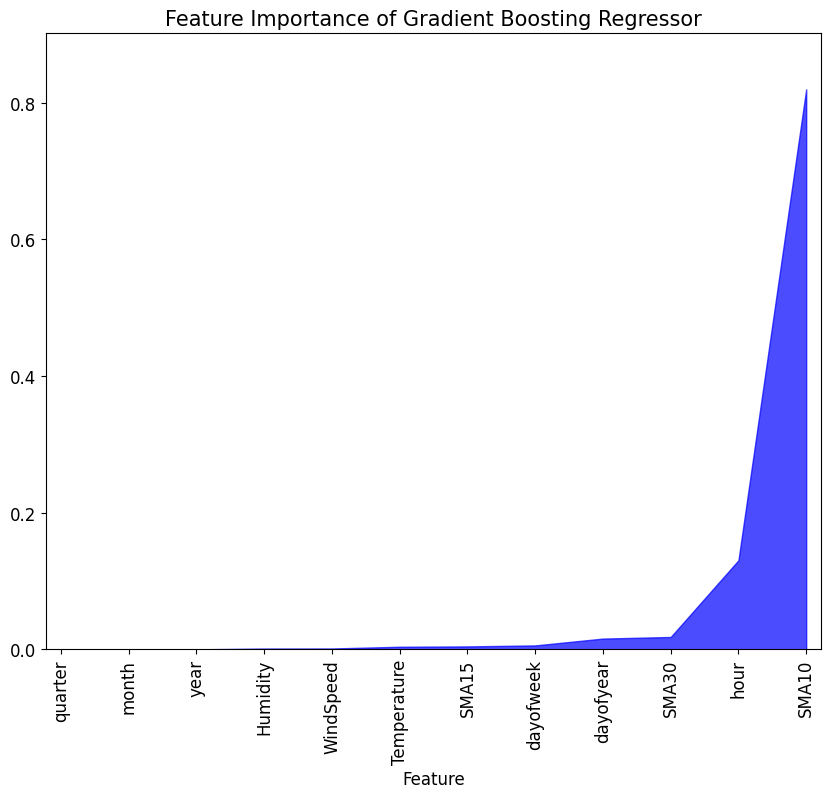

In [ ]:
fi = pd.DataFrame({'importance': reg.feature_importances_}, index=X_train.columns)
fi_sorted = fi.sort_values(by='importance', ascending=True)

# Create an area plot to represent feature importance
plt.figure(figsize=(10,8))
plt.stackplot(fi_sorted.index, fi_sorted.importance, color='blue', alpha=0.7)
plt.title('Feature Importance of Gradient Boosting Regressor', fontsize=15)
plt.xlabel('Feature', fontsize=12)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.margins(0.02, 0.1)

# Show the plot
plt.show()

In [ ]:
# Creating a DataFrame of predictions
y_test = pd.DataFrame(y_test)
y_test['prediction'] = reg.predict(X_test)

# Merging the predictions with the original dataset
data = data.merge(y_test[['prediction']], how='left', left_index=True, right_index=True)

data.tail()
data.columns

Index(['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows', 'PowerConsumption_Zone1', 'PowerConsumption_Zone2',
       'PowerConsumption_Zone3', 'hour', 'dayofweek', 'quarter', 'month',
       'year', 'dayofyear', 'dayofmonth', 'weekofyear', 'SMA10', 'SMA15',
       'SMA30', 'prediction'],
      dtype='object')

#Linear Regression model

Mean Squared Error: 1646841.8083909634


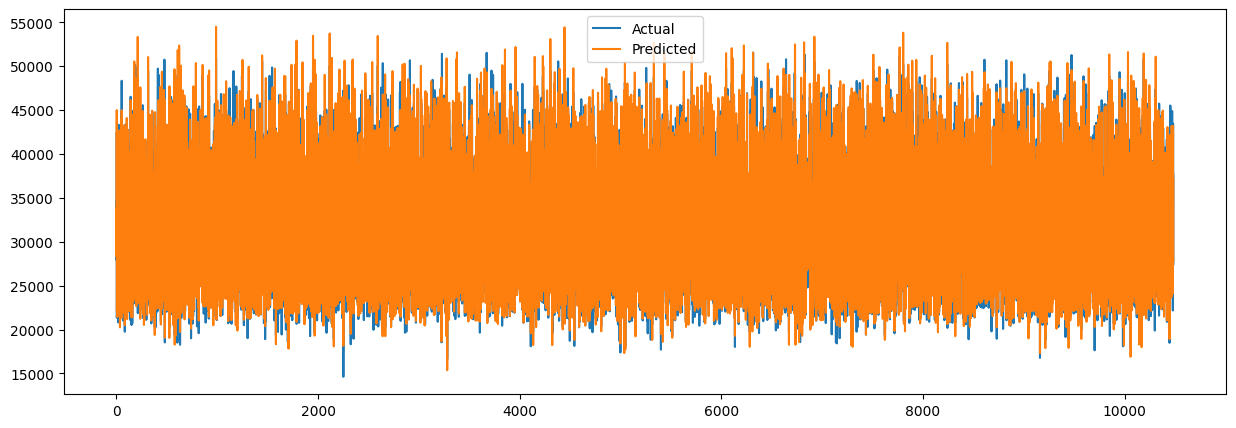

In [ ]:
from sklearn.impute import SimpleImputer

# Define target variable
y = data['PowerConsumption_Zone1']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop(['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3'], axis=1),
                                                    y, test_size=0.2, random_state=42)

# Fill any missing values in X_train and X_test with column means
imputer = SimpleImputer()
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Scale the training and testing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a linear regression model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Use the trained model to make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the mean squared error of the model's predictions
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Visualize the model's predictions and actual values
plt.figure(figsize=(15,5))
plt.plot(y_test.reset_index(drop=True), label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()


#Random Forest Model

Root Mean Squared Error (RMSE): 555.0176245051299


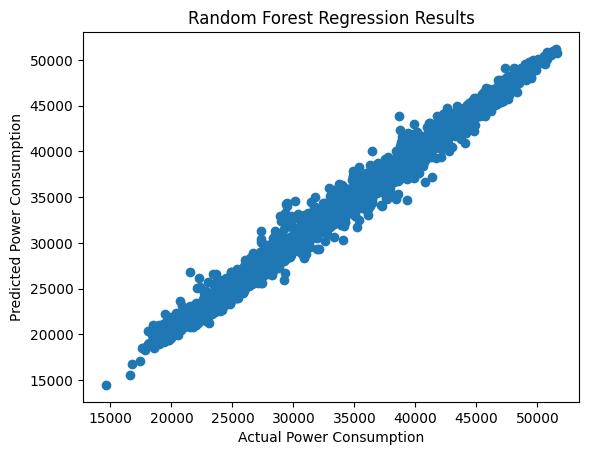

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Replace NaN values with the mean of the column
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# create a random forest regression model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# fit the model on the training data
rf.fit(X_train, y_train)

# make predictions on the test data
y_pred = rf.predict(X_test)

# reshape y_test and y_pred
y_test = y_test.values[:, np.newaxis] # add a new axis to y_test
y_test = y_test[:, 0]
y_pred = y_pred[:]

# evaluate the model performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# create scatter plot of predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Power Consumption')
plt.ylabel('Predicted Power Consumption')
plt.title('Random Forest Regression Results')
plt.show()


Mean Squared Error: 56062171.252155885


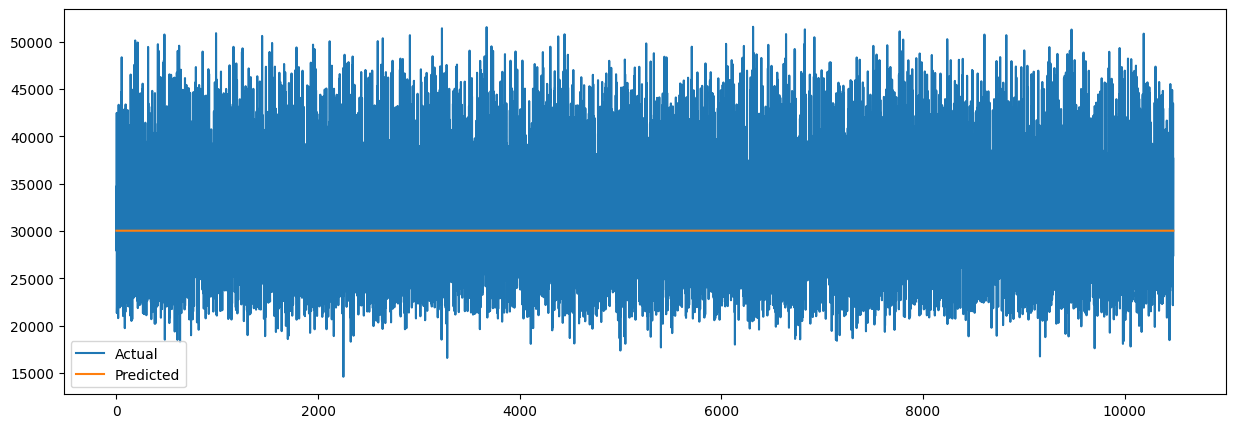

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Define target variable
y = data['PowerConsumption_Zone1']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop(['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3'], axis=1),
                                                    y, test_size=0.2, random_state=42)

# Fill any missing values in X_train and X_test with column means
imputer = SimpleImputer()
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Scale the training and testing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Calculate the moving average on the training data
window_size = 10
y_train_ma = np.convolve(y_train, np.ones(window_size)/window_size, mode='valid')

# Use the moving average as predictions for the testing data
y_pred = np.repeat(y_train_ma[-1], len(y_test))

# Calculate the mean squared error of the model's predictions
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Visualize the model's predictions and actual values
plt.figure(figsize=(15, 5))
plt.plot(y_test.reset_index(drop=True), label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()


#Interactive GUI

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

Dropdown(description='Zone', options=('Zone1', 'Zone2', 'Zone3'), value='Zone1')

FloatSlider(value=30.0, description='Humidity', step=1.0)

FloatSlider(value=10.0, description='Temperature', max=40.0, min=-10.0, step=1.0)

FloatSlider(value=18.0, description='Wind Speed', max=50.0, step=1.0)

Button(description='Predict', style=ButtonStyle())

Label(value='')

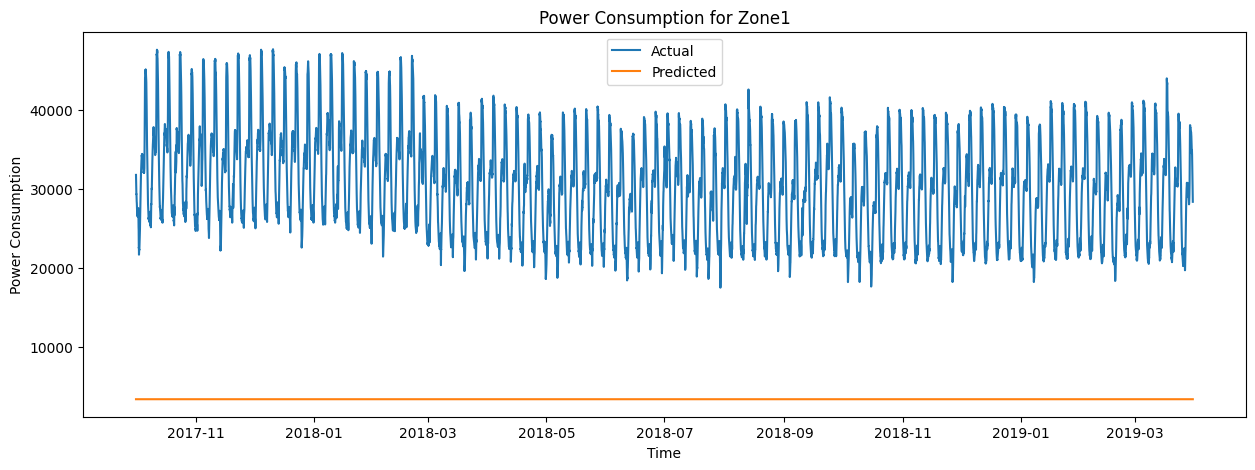

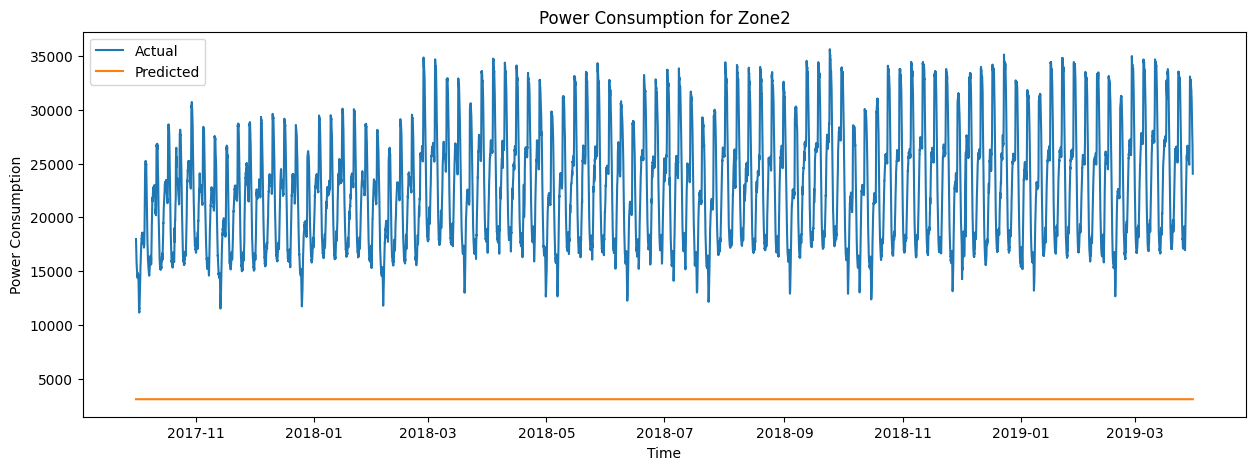

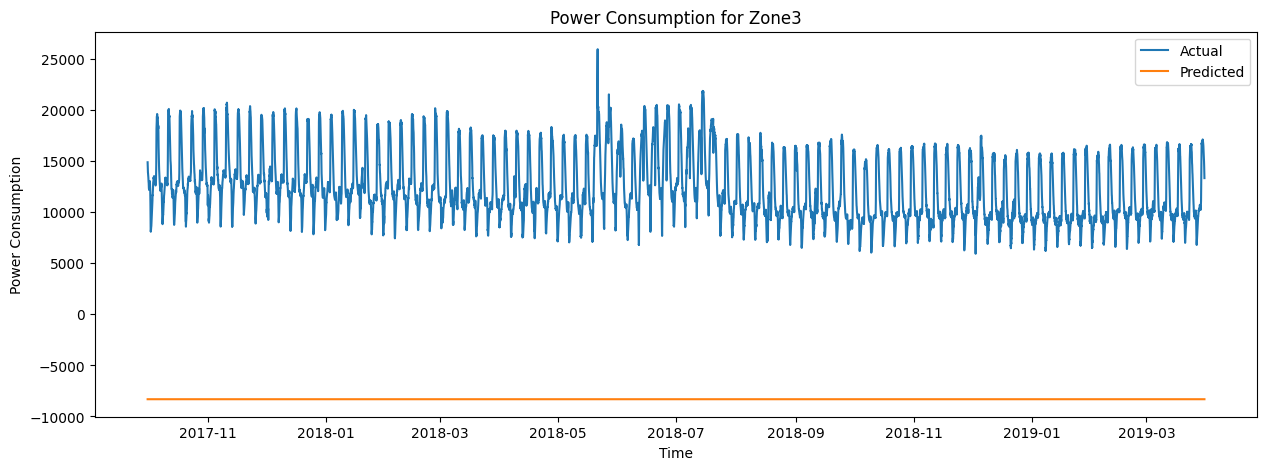

In [ ]:
import ipywidgets as widgets
# Define target variables for all zones
zones = ['Zone1', 'Zone2', 'Zone3']
y = {
    'Zone1': data['PowerConsumption_Zone1'],
    'Zone2': data['PowerConsumption_Zone2'],
    'Zone3': data['PowerConsumption_Zone3']
}

# Split data into training and testing sets for all zones
X_train = data.loc[:'10-01-2017',['Humidity', 'Temperature', 'WindSpeed',
                                  'dayofyear','hour', 'dayofweek', 'quarter',
                                  'month', 'year','SMA10', 'SMA30', 'SMA15']]
y_train = {
    zone: data.loc[:'10-01-2017', [f'PowerConsumption_{zone}']] for zone in zones
}

X_test = data.loc['10-01-2017':,['Humidity', 'Temperature', 'WindSpeed',
                                 'dayofyear', 'hour', 'dayofweek', 'quarter',
                                 'month', 'year','SMA10', 'SMA30', 'SMA15']]
y_test = {
    zone: data.loc['10-01-2017':, [f'PowerConsumption_{zone}']] for zone in zones
}

# Apply imputation to fill missing values in X_train and X_test
imputer = SimpleImputer()
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Train linear regression models for all zones
models = {zone: LinearRegression() for zone in zones}
for zone in zones:
    models[zone].fit(X_train, y_train[zone])



def predict_power_consumption(zone, humidity, temperature, windspeed):
    # Create a sample input based on user selection
    input_data = [[humidity, temperature, windspeed, 183, 12, 3, 2, 6, 2021, 156, 149, 151]]

    # Use the trained model to make predictions on the input data
    y_pred = models[zone].predict(input_data)

    return y_pred[0]

def on_button_clicked(b):
    zone = zone_dropdown.value
    humidity = humidity_slider.value
    temperature = temperature_slider.value
    windspeed = windspeed_slider.value

    # Predict power consumption based on user input and selected zone
    prediction = predict_power_consumption(zone, humidity, temperature, windspeed)
    prediction_scalar = prediction.item()  # Convert numpy ndarray to scalar

    # Get the actual values for the selected zone from the test data
    actual_values = y_test[zone].values

    # Create a time index for the x-axis
    time_index = pd.date_range(start='10-01-2017', periods=len(actual_values), freq='H')

    # Repeat the single prediction value to match the length of time_index
    prediction = np.repeat(prediction_scalar, len(time_index))

    # Plot the predicted values and actual values
    plt.figure(figsize=(15, 5))
    plt.plot(time_index, actual_values, label='Actual')
    plt.plot(time_index, prediction, label='Predicted')
    plt.xlabel('Time')
    plt.ylabel('Power Consumption')
    plt.title(f'Power Consumption for {zone}')
    plt.legend()
    plt.show()

    # Display the prediction
    result_label.value = f"Predicted Power Consumption for {zone}: {prediction_scalar:.2f}"




# Create dropdown for zone selection
zone_dropdown = widgets.Dropdown(options=zones, description='Zone')

# Create sliders for user input
humidity_slider = widgets.FloatSlider(value=30, min=0, max=100, step=1, description='Humidity')
temperature_slider = widgets.FloatSlider(value=10, min=-10, max=40, step=1, description='Temperature')
windspeed_slider = widgets.FloatSlider(value=18, min=0, max=50, step=1, description='Wind Speed')

# Create button for prediction
predict_button = widgets.Button(description='Predict')
predict_button.on_click(on_button_clicked)

# Create label for displaying the result
result_label = widgets.Label()

# Display the widgets
display(zone_dropdown, humidity_slider, temperature_slider, windspeed_slider, predict_button, result_label)
